In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
flight=pd.read_csv('C:\\Users\\Factory\\Desktop\\EastWestAirlines.csv')

In [3]:
flight.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
flight.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
df_norm=norm_func(flight.iloc[:,1:])

In [8]:
import seaborn as sn

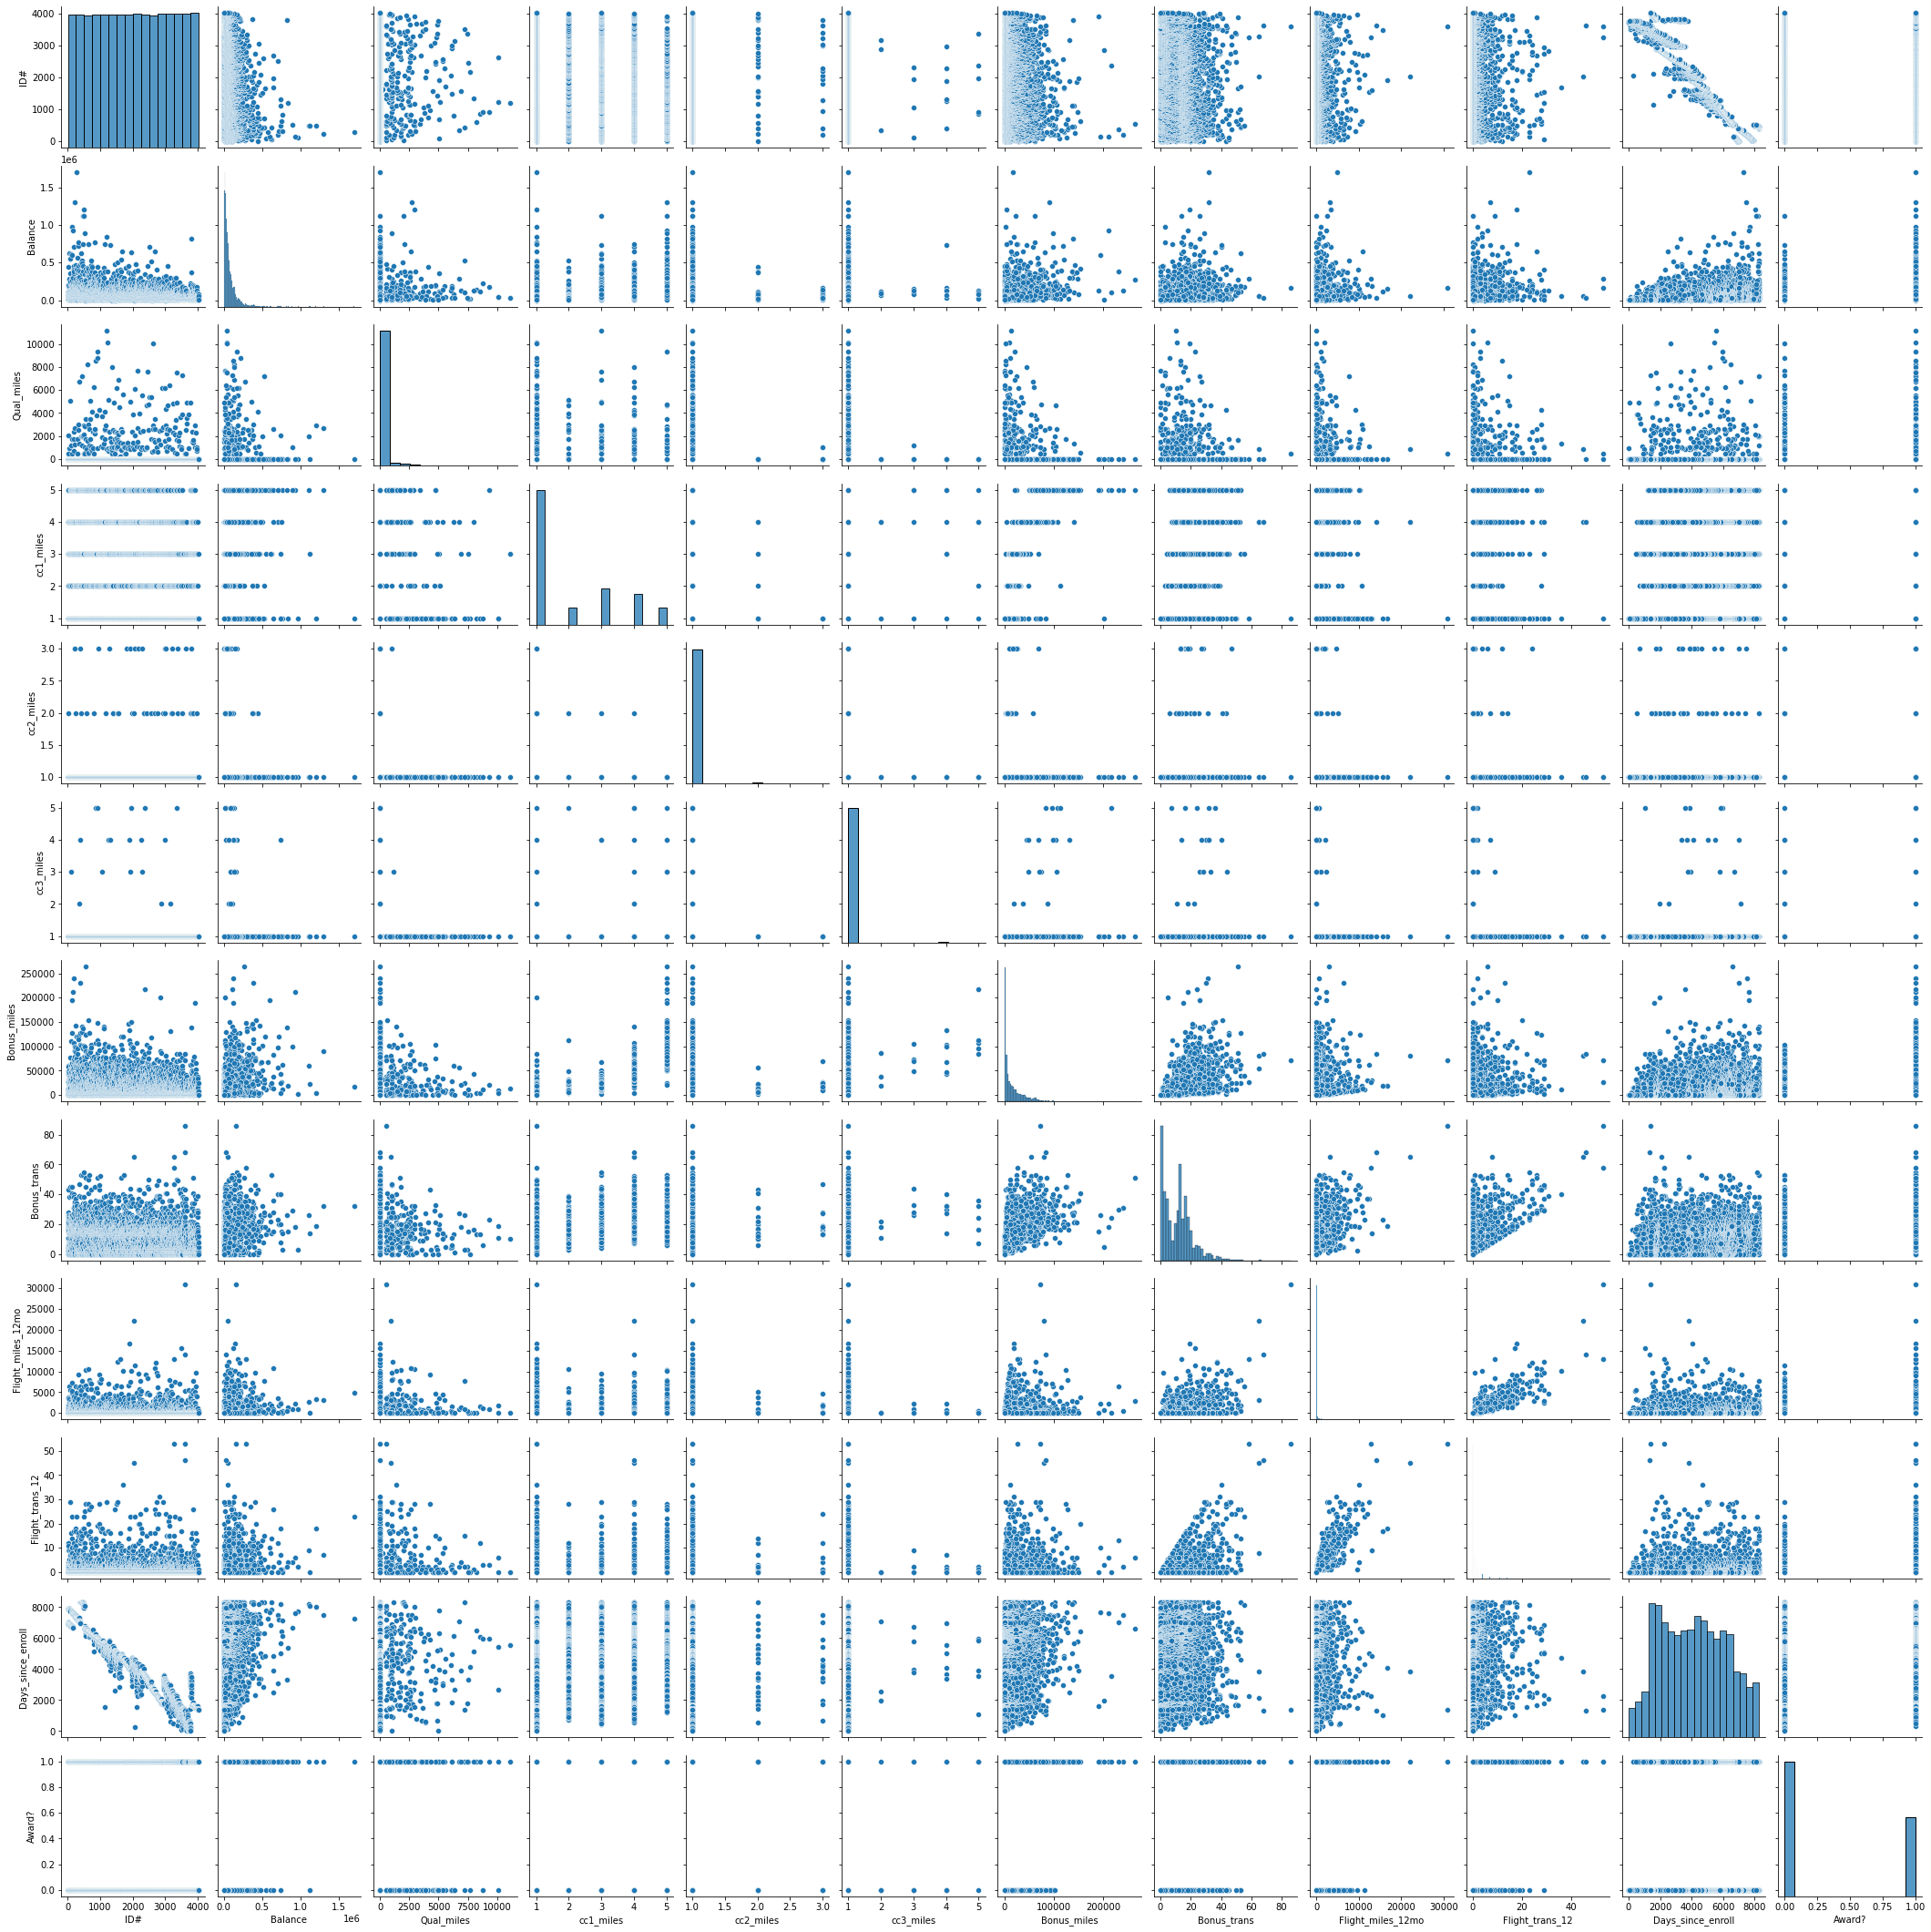

In [9]:
sn.pairplot(flight)

In [10]:
k=list(range(10,20))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([785.8513392]),
 array([775.73330569]),
 array([740.85235913]),
 array([745.13623313]),
 array([716.40997223]),
 array([715.646138]),
 array([677.40550094]),
 array([686.01069735]),
 array([657.33743348]),
 array([645.63721651])]

([<matplotlib.axis.XTick at 0x26346155100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

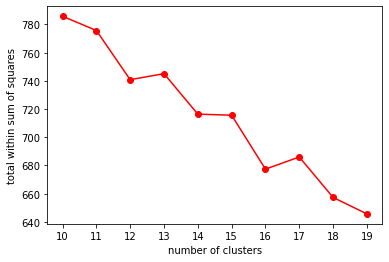

In [11]:
plt.plot(k,TWSS, 'ro-');plt.xlabel('number of clusters');plt.ylabel('total within sum of squares');plt.xticks(k)

In [12]:
model1=KMeans(n_clusters=14)
model1.fit(df_norm)

KMeans(n_clusters=14)

In [13]:
model1.cluster_centers_
model1.labels_
model=pd.Series(model1.labels_)
model
flight['clust']=model

In [14]:
flightfinal=flight.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [15]:
flightfinal.head()

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,8,1,28143,0,1,1,1,174,1,0,0,7000,0
1,8,2,19244,0,1,1,1,215,2,0,0,6968,0
2,8,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,8,4,14776,0,1,1,1,500,1,0,0,6952,0
4,0,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
fly=flight.iloc[:,1:13].groupby(flightfinal.clust).mean()

In [17]:
fly

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,93463.498305,218.427119,3.545763,1.003390,1.000000,31426.400000,18.616949,573.494915,1.650847,6188.867797,1.000000,0
1,40545.720482,89.602410,1.000000,1.000000,1.007229,2373.253012,4.821687,218.368675,0.626506,2901.431325,0.000000,1
2,93784.964169,324.869707,1.159609,1.019544,1.019544,8404.146580,9.765472,716.218241,2.263844,6065.390879,1.000000,2
3,72532.725000,73.971429,2.682143,1.000000,1.010714,16710.453571,15.832143,166.932143,0.439286,2746.885714,0.000000,3
4,44748.367769,102.698347,1.072314,1.000000,1.000000,3107.816116,6.378099,288.896694,0.886364,4750.165289,0.000000,4
5,56817.246201,216.838906,1.164134,1.015198,1.000000,7746.349544,8.875380,585.474164,1.875380,2714.079027,1.000000,5
6,128835.229787,51.148936,3.451064,1.000000,1.021277,27839.127660,16.425532,198.059574,0.655319,6357.561702,0.000000,6
7,24795.736162,98.773063,1.009225,1.000000,1.007380,2764.356089,5.957565,227.562731,0.634686,1269.298893,0.000000,7
8,55974.098551,72.828986,1.144928,1.000000,1.002899,3245.681159,6.959420,188.315942,0.527536,6861.707246,0.000000,8


In [18]:
flightfinal.to_csv("flightfinalkmewa.csv",encoding="utf-8")